In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## This notebook creates basic bar plots describing the EML variable (Fig. 3). This includes the number of EML vs. no EML cases, the number of EMLs per year, and the number of EMLs per hour. 

#### EML_May_2012_2021.csv contains 10 years (2012-2021) of EML data for the month of May only. Data are 6-hourly (0, 6, 12, 18 UTC). 
 - 'eml' variable is binary, where 1=EML, 0=no EML. This is the variable we are trying to predict.
 - latitude, longitude, and time variables indicate when and where there is or isn't an EML.
 - all other variables are possible predictors for our ML model

In [2]:
# Open the CSV file containing the May 2012-2021 EML dataset
df = pd.read_csv('/home/scratch/mandrews/eae_598/EML_May_2012_2021.csv')
df.head()

,latitude,longitude,time,Z500,t500,wspd500,wdir500,mucape,mucin,mlcape,...,theta_850,theta_925,theta_sfc,t925,rh_sfc,rh_925,rh_850,rh_700,rh_500,rh_3_6km
0,26.0,253.00,2012-05-01 00:00:00,5.843171,-9.134342,5.660553,205.892493,0.0,0.0,0.0,...,NaN,NaN,313.883362,NaN,0.267810,NaN,NaN,0.448221,0.275484,0.199151
1,26.0,253.25,2012-05-01 00:00:00,5.843966,-9.297320,5.074431,202.685653,0.0,0.0,0.0,...,NaN,NaN,315.494537,NaN,0.253985,NaN,NaN,0.365675,0.325275,0.236668
2,26.0,253.50,2012-05-01 00:00:00,5.844372,-9.441615,5.426132,192.996072,0.0,0.0,0.0,...,NaN,NaN,316.565155,NaN,0.233949,NaN,NaN,0.309428,0.276469,0.241000
3,26.0,253.75,2012-05-01 00:00:00,5.846489,-9.879836,4.917766,180.679988,0.0,0.0,0.0,...,NaN,NaN,317.429565,NaN,0.219240,NaN,NaN,0.280152,0.366142,0.259380
4,26.0,254.00,2012-05-01 00:00:00,5.847194,-10.555432,3.565028,182.630536,0.0,0.0,0.0,...,NaN,NaN,318.495514,NaN,0.158403,NaN,NaN,0.231137,0.591805,0.389781


In [3]:
# This seperates the date column to get a new year column
df['year'] = [int(x.split('-')[0]) for x in df['time']]

# This seperates the date column to get a new hour column
df['hour'] = [str(x.split(' ')[1])[0:2] for x in df['time']]

# Change variable types to integers to make plotting easier
df['eml'] = df['eml'].astype(int)
df['hour'] = df['hour'].astype(int)

In [4]:
# Select all the EML cases in the dataset
emls = df[df['eml'] == 1]

# Select all the not EML cases in the dataset
no_emls = df[df['eml'] == 0]

#### Create bar plots to visualize EML variable: 

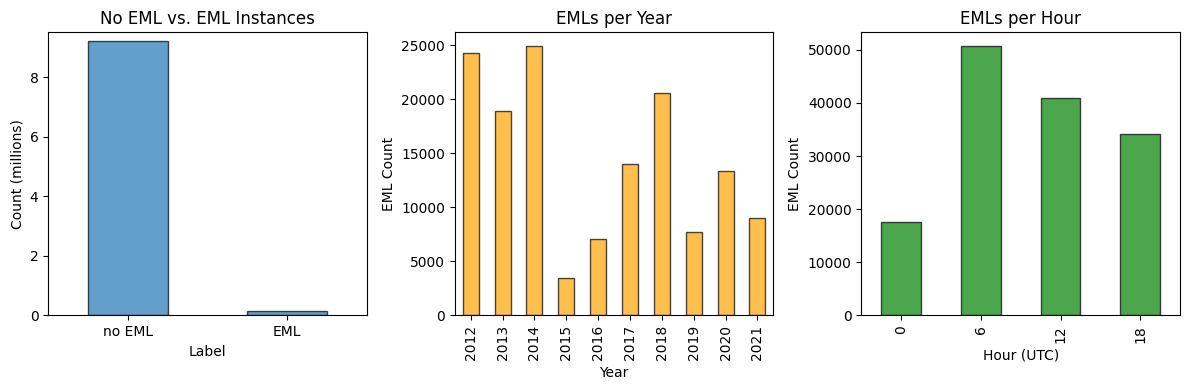

In [5]:
# Create bar plot of the # of EML vs no EML cases in the dataset; also plot EMLs per year and per hour

fig, axes = plt.subplots(1, 3, figsize=(12,4))

# Group the EML dataset by year; gives the number of EMLs in each year
emls_per_year = emls.groupby('year').size()

# Group the EML dataset by hour
emls_per_hour = emls.groupby('hour').size()

# Plot the 3 bar plots
ax = df.eml.value_counts().plot.bar(title='No EML vs. EML Instances', xlabel='Label', ylabel='Count (millions)', ax=axes[0], alpha=0.7, edgecolor='black')
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylim(0,9500000)
ax.set_yticks([0, 2000000, 4000000, 6000000, 8000000])
ax.set_yticklabels(['0', '2', '4', '6', '8'])
ax.set_xticklabels(['no EML', 'EML'], rotation='horizontal')
emls_per_year.plot.bar(title='EMLs per Year', xlabel='Year', ylabel='EML Count', ax=axes[1], alpha=0.7, color='orange', edgecolor='black')
emls_per_hour.plot.bar(title='EMLs per Hour', xlabel='Hour (UTC)', ylabel='EML Count', ax=axes[2], alpha=0.7, color='green', edgecolor='black')

plt.tight_layout()
plt.show()